# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

Importing Code for GPU Process Summary

In [139]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Tue Jul 18 16:38:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    42W / 300W |   9260MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [140]:
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')
! pwd

You are using a high-RAM runtime!
/content


Shell Function for printing HTML

In [221]:
%%shell
jupyter nbconvert --to html ///content/Murat_Goksenin_Guzel_Computer_Vision_Project8.ipynb

[NbConvertApp] Converting notebook ///content/Murat_Goksenin_Guzel_Computer_Vision_Project8.ipynb to html
[NbConvertApp] Writing 3098097 bytes to /content/Murat_Goksenin_Guzel_Computer_Vision_Project8.html


Importing Libararies

In [142]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images


from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

Connecting Colab

In [143]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Images from Colab Mounted Drive

In [144]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/RootCSV/images.npy')

In [145]:
# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/RootCSV/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [146]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.

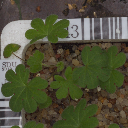

In [147]:
cv2_imshow(images[3])

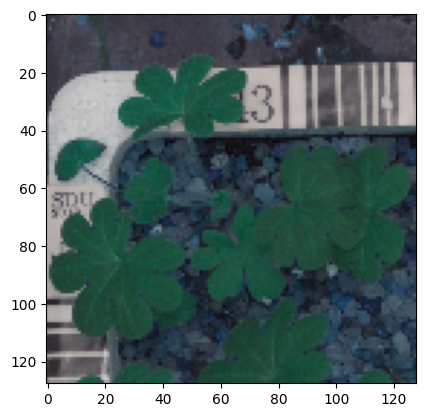

In [148]:
plt.imshow(images[3])

- The images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in **BGR** format and this shows that the given numpy arrays were generated from the original images using OpenCV.


## Exploratory Data Analysis

In [149]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

Images are ctegorized as following type

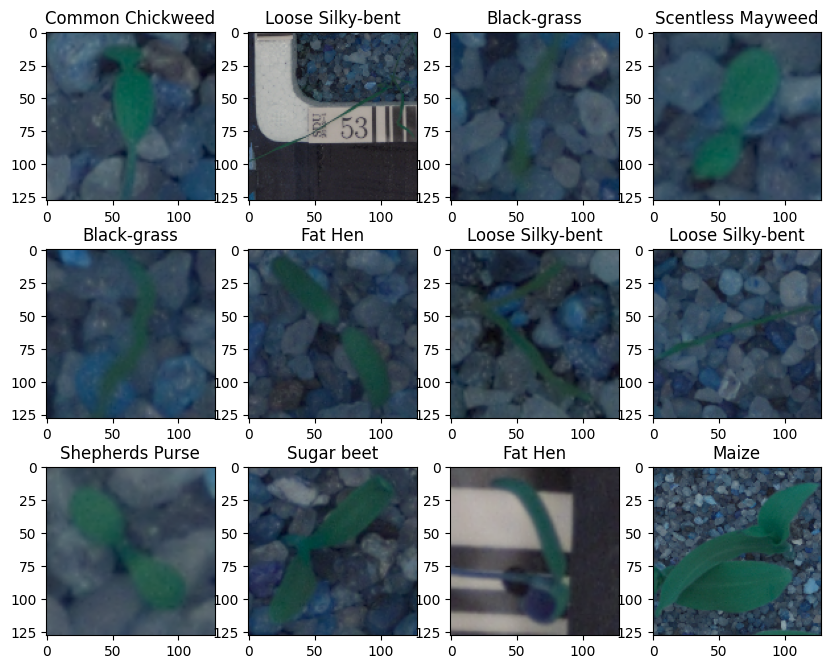

In [150]:
plot_images(images,labels)

Labels coded below for images

In [151]:
labels['Label']

0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: Label, Length: 4750, dtype: object

Imbalanced Data Set exits

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

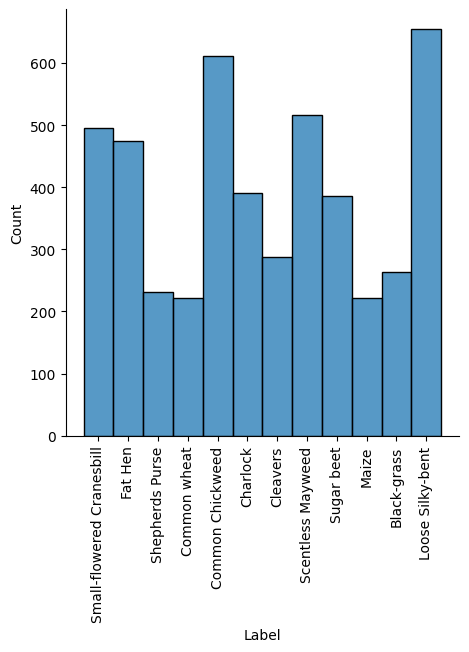

In [152]:
sns.displot(labels, x='Label')
plt.xticks(rotation='vertical')

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [153]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

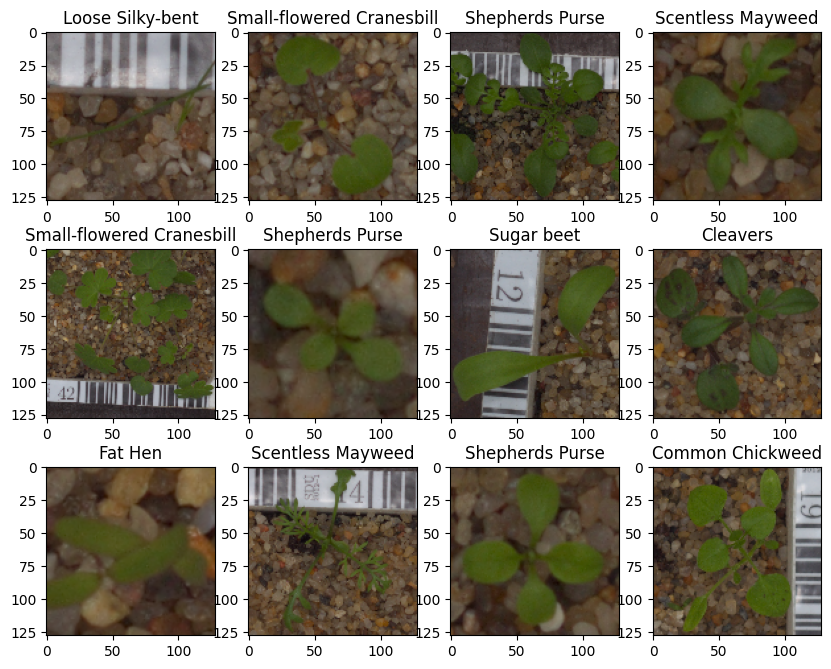

In [154]:
plot_images(images,labels)

Images converted to RGB

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [155]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

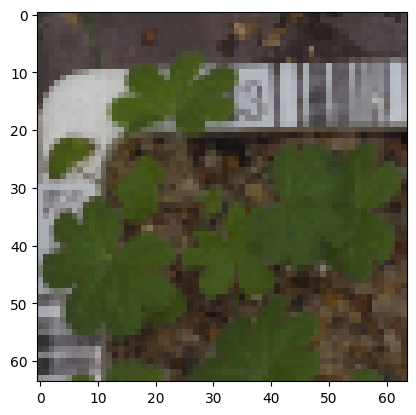

In [156]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling

1)Split the data into train, test, and validation to be able to evaluate the model,

2)Encode categorical features and scale the pixel values,

3)Train data and then check its performance.


**Split the dataset**

In [157]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [158]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


Training , Validation and Test data shape with size 64*64 having 3 Channels of RGB

### Encode the target labels

In [159]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization

Data normalization is critical part for avoiding exploding gradients problem at learning curve

In [160]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

**MODEL 1**

Standart CNN Model

In [161]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [162]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

CNN Model with the following 2 main parts -

1)The Feature Extraction layers which are comprised of convolutional and pooling layers.

2)The Fully Connected classification layers for prediction

Model starting with

1)Conv layer starting with 64 filters

2)Kernel size 3x3

3)Pading same [pads the same pattern out of the corners to capture the image cornes's pattern ]

4)Input shape 64x63 with 3 RGB Channels




In [163]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

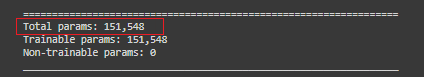


Configration Epochs=30 BacthSize=32

In [164]:
history = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 4s - loss: 2.4434 - accuracy: 0.1185 - val_loss: 2.3662 - val_accuracy: 0.2150 - 4s/epoch - 32ms/step
Epoch 2/30
121/121 - 1s - loss: 2.2667 - accuracy: 0.2074 - val_loss: 2.0680 - val_accuracy: 0.2710 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0987 - accuracy: 0.2602 - val_loss: 1.9318 - val_accuracy: 0.3481 - 889ms/epoch - 7ms/step
Epoch 4/30
121/121 - 1s - loss: 2.0039 - accuracy: 0.2735 - val_loss: 1.8144 - val_accuracy: 0.3668 - 894ms/epoch - 7ms/step
Epoch 5/30
121/121 - 1s - loss: 1.9439 - accuracy: 0.2768 - val_loss: 1.7836 - val_accuracy: 0.3692 - 1s/epoch - 8ms/step
Epoch 6/30
121/121 - 1s - loss: 1.9010 - accuracy: 0.3005 - val_loss: 1.7157 - val_accuracy: 0.3832 - 979ms/epoch - 8ms/step
Epoch 7/30
121/121 - 1s - loss: 1.8607 - accuracy: 0.3109 - val_loss: 1.6497 - val_accuracy: 0.4346 - 940ms/epoch - 8ms/step
Epoch 8/30
121/121 - 1s - loss: 1.8173 - accuracy: 0.3153 - val_loss: 1.6131 - val_accuracy: 0.4346 - 909ms/epoch - 8ms/step
Epoch 9/

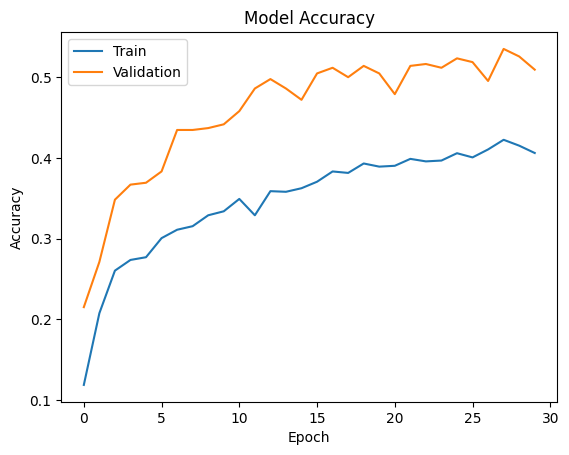

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [166]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.4573 - accuracy: 0.5116 - 68ms/epoch - 5ms/step


Model accuracy is not in good shape , training and validation starts showing different accuracy patterns after ~4th EPOC

### **Generating the predictions using test data**

In [167]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 2ms/step


In [168]:
y_pred

array([[3.3024031e-11, 1.1944180e-05, 4.4070990e-08, ..., 2.4155375e-02,
        2.4307035e-05, 4.1125747e-03],
       [1.2383546e-07, 1.4952960e-02, 6.4668424e-02, ..., 4.6005875e-02,
        8.6565161e-01, 4.8408103e-03],
       [3.1156018e-05, 2.9105237e-03, 3.2504220e-02, ..., 3.3743270e-02,
        8.7029767e-01, 3.0161049e-02],
       ...,
       [2.4430192e-01, 6.2250258e-09, 2.5647780e-04, ..., 4.9816609e-12,
        7.6416184e-10, 5.7236720e-03],
       [6.6074479e-04, 2.2053871e-02, 9.6422303e-03, ..., 1.0451895e-01,
        2.2409942e-02, 1.2081322e-01],
       [1.7860864e-07, 1.2687178e-01, 1.4999735e-01, ..., 1.4515255e-01,
        5.4946816e-01, 8.5713277e-03]], dtype=float32)

### **Plotting the Confusion Matrix**


The Confusion matrix expects categorical data as input.

However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.

I will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

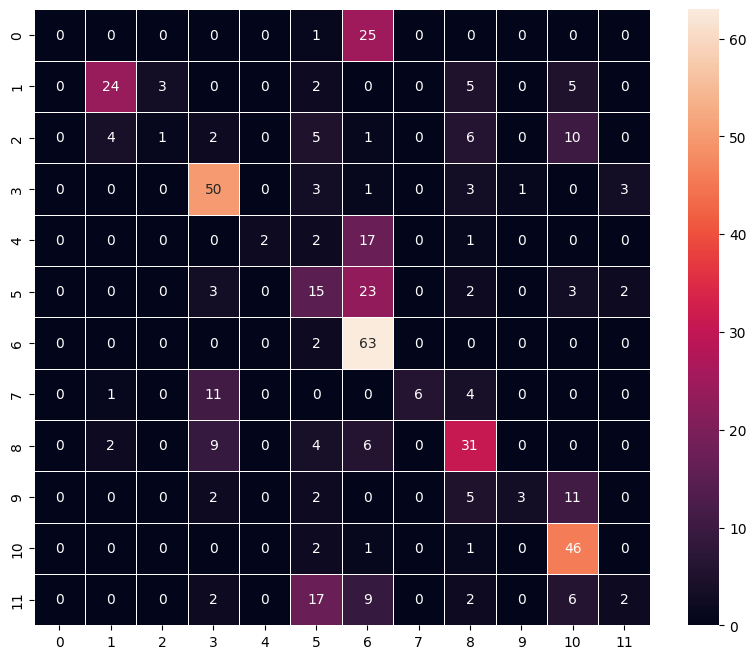

In [169]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly.
- In comparison to the rest, we can see that classes 0,6,11 are well classified.
- We can also observe that classes 1,2,5,7  are mostly misclassified.

## Model Performance Improvement

MODEL 2

Using Data Augmentation for enlarging training dataset

### **Data Augmentation**

Data Augmentation

CNNs have the property of translational invariance, which means they can recognise an object even if its appearance shifts translationally in some way.
Taking this attribute into account, we can augment the images using the techniques listed below -
1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.

I will use changing the **rotation** technique


In [170]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

Building up the model with using Conv layers, Padding , Pooling[MAX] with ADAM optimizer and cocluding with softmax

In [171]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                      

In [172]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history1 = model1.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 7s 76ms/step - loss: 2.3055 - accuracy: 0.2088 - val_loss: 2.4022 - val_accuracy: 0.2453
Epoch 2/25
60/60 [==============================] - 4s 72ms/step - loss: 1.8278 - accuracy: 0.3883 - val_loss: 2.3212 - val_accuracy: 0.1916
Epoch 3/25
60/60 [==============================] - 5s 75ms/step - loss: 1.5695 - accuracy: 0.4618 - val_loss: 2.2428 - val_accuracy: 0.2874
Epoch 4/25
60/60 [==============================] - 4s 73ms/step - loss: 1.4393 - accuracy: 0.5033 - val_loss: 2.1353 - val_accuracy: 0.2196
Epoch 5/25
60/60 [==============================] - 4s 72ms/step - loss: 1.3416 - accuracy: 0.5445 - val_loss: 2.0065 - val_accuracy: 0.4299
Epoch 6/25
60/60 [==============================] - 5s 75ms/step - loss: 1.2774 - accuracy: 0.5533 - val_loss: 1.6689 - val_accuracy: 0.4603
Epoch 7/25
60/60 [==============================] - 4s 72ms/step - loss: 1.2077 - accuracy: 0.5823 - val_loss: 1.4985 - val_accuracy: 0.5444
Epoch 8/25
60

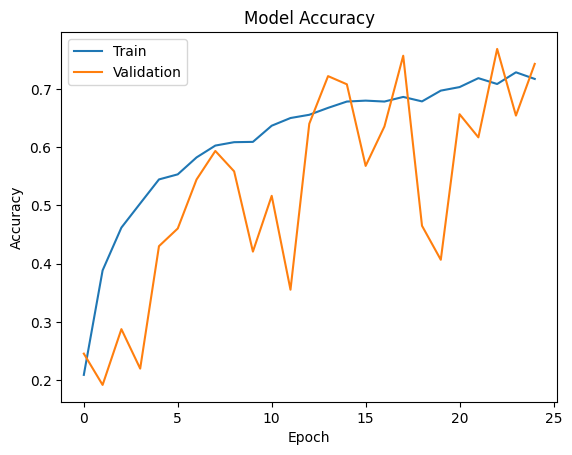

In [173]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [174]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9208 - accuracy: 0.7053 - 75ms/epoch - 5ms/step


We can observe that our accuracy has improved compared to our previous model. But training and validation still not alligned position

In [175]:
# Here we would get the output as probablities for each category
y_pred1=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


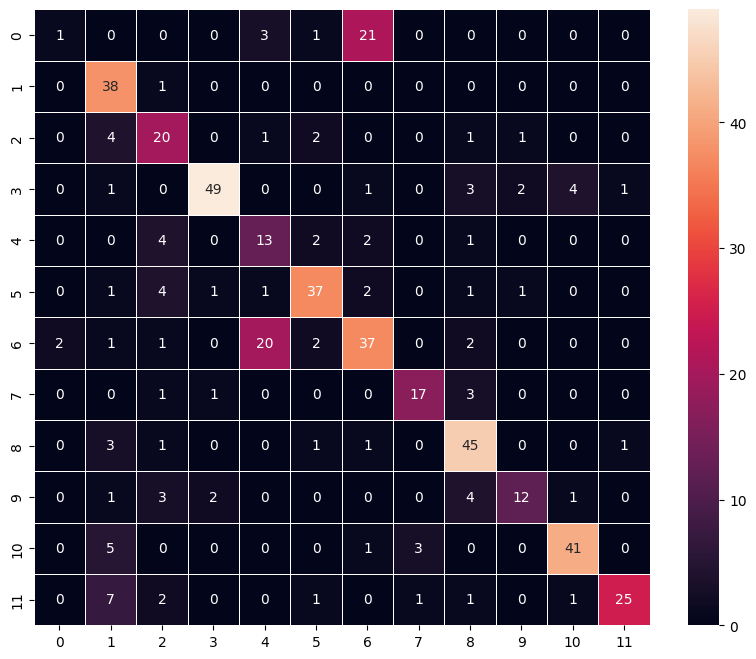

In [176]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred1,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observation:

The confusion matrix appears to be improving as well, however there is still some confusion with the 0,6,9 classes of monkey species.

The 0 class is the most confused class among all.



## Transfer Learning

I will be using  Transfer Learning for model improvement.

i will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset

I will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them.



I increased the image size to 224x224 since ImageNet expects size as this

In [177]:
images_increased=[]
height = 224
width = 224
dimensions = (width, height)
for i in range(len(images)):
  images_increased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

Preparing Train,Test,Val data sets

In [178]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_increased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [179]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 224, 224, 3) (3847, 1)
(428, 224, 224, 3) (428, 1)
(475, 224, 224, 3) (475, 1)


Now shape of Train,Validation and Test set images composed of 224x224

In [180]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

Labesl turned into binary format for prediction

Normalizing the data to prevent exploding gradients

In [181]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Transfering weights from ImageNet, I will get just the convolutional layers not fully connected layers by setting **include_top=False**

In [182]:
# Summary of the whole model
model3 = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
model3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [183]:
# Getting only the conv layers for transfer learning.
transfer_layer = model3.get_layer('block5_pool')
vgg_model = Model(inputs=model3.input, outputs=transfer_layer.output)

In [184]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Making all the layers of the VGG model non-trainable. i.e. freezing them

In [185]:

for layer in vgg_model.layers:
    layer.trainable = False

Checking trainable property

In [186]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [187]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(BatchNormalization())
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(BatchNormalization())
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                      

In [188]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                      

In [189]:
# Epochs
epochs = 20
# Batch size
batch_size = 32

history = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
120/120 [==============================] - 46s 356ms/step - loss: 0.6029 - accuracy: 0.0823 - val_loss: 0.4023 - val_accuracy: 0.1028
Epoch 2/20
120/120 [==============================] - 48s 401ms/step - loss: 0.3508 - accuracy: 0.1177 - val_loss: 0.3013 - val_accuracy: 0.1939
Epoch 3/20
120/120 [==============================] - 42s 352ms/step - loss: 0.2765 - accuracy: 0.2396 - val_loss: 0.2729 - val_accuracy: 0.2056
Epoch 4/20
120/120 [==============================] - 44s 362ms/step - loss: 0.2557 - accuracy: 0.3020 - val_loss: 0.2415 - val_accuracy: 0.3575
Epoch 5/20
120/120 [==============================] - 42s 352ms/step - loss: 0.2479 - accuracy: 0.3198 - val_loss: 0.2412 - val_accuracy: 0.3294
Epoch 6/20
120/120 [==============================] - 42s 353ms/step - loss: 0.2314 - accuracy: 0.3680 - val_loss: 0.2445 - val_accuracy: 0.3364
Epoch 7/20
120/120 [==============================] - 42s 352ms/step - loss: 0.2241 - accuracy: 0.3929 - val_loss: 0.2192 - val_ac

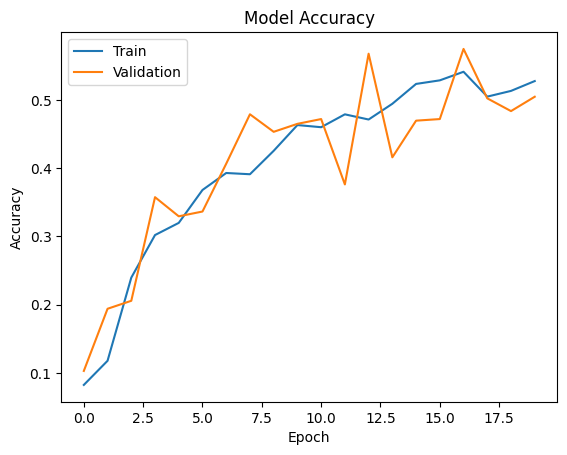

In [190]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Training and Validation Accuracy values show same pattern and less overfit than the other models. But still less than single Data Augmentation

In [191]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.1794 - accuracy: 0.5116 - 670ms/epoch - 45ms/step


In [192]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 1s 41ms/step


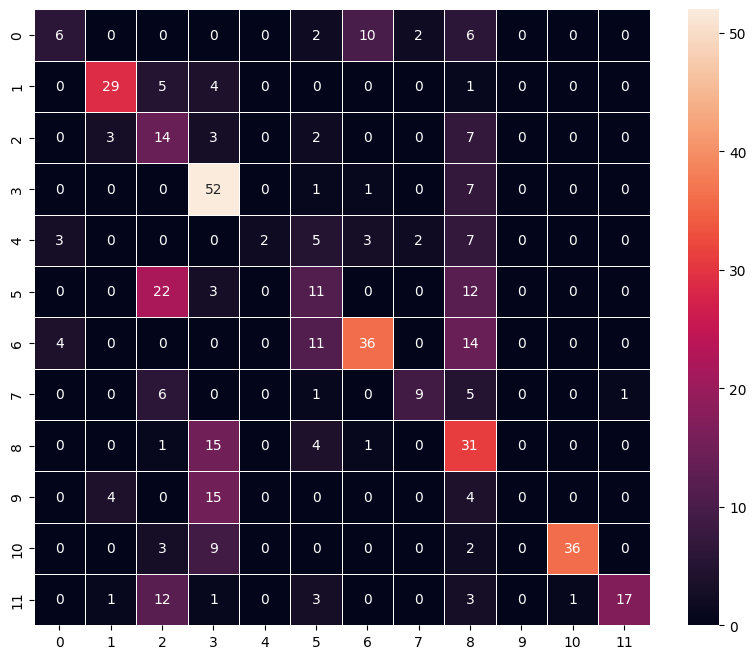

In [193]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Final Model

For final model I used enlarged data set with Data Augmentation technique and decreased size of pictures to 28x28 .

I used SGD instead of ADAM and CNN applied on normalization data set.



Decrease the size to 28x28

In [194]:
images_decreased=[]
height = 28
width = 28
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

Generating Trainingm, Test , Validation

In [195]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [196]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 28, 28, 3) (3847, 1)
(428, 28, 28, 3) (428, 1)
(475, 28, 28, 3) (475, 1)


In [197]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

Normalizing the data

In [198]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Building up CNN Model

In [203]:
#Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 32)        

In [204]:
# Epochs
epochs = 30
# Batch size
batch_size = 32

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
120/120 [==============================] - 4s 20ms/step - loss: 2.4298 - accuracy: 0.1455 - val_loss: 2.4133 - val_accuracy: 0.1636
Epoch 2/30
120/120 [==============================] - 2s 17ms/step - loss: 2.3559 - accuracy: 0.1893 - val_loss: 2.1374 - val_accuracy: 0.2710
Epoch 3/30
120/120 [==============================] - 2s 17ms/step - loss: 1.9284 - accuracy: 0.3248 - val_loss: 1.7196 - val_accuracy: 0.3668
Epoch 4/30
120/120 [==============================] - 2s 17ms/step - loss: 1.6674 - accuracy: 0.3921 - val_loss: 1.8794 - val_accuracy: 0.3668
Epoch 5/30
120/120 [==============================] - 2s 20ms/step - loss: 1.5011 - accuracy: 0.4621 - val_loss: 1.4704 - val_accuracy: 0.5047
Epoch 6/30
120/120 [==============================] - 2s 18ms/step - loss: 1.3541 - accuracy: 0.5219 - val_loss: 1.4719 - val_accuracy: 0.4883
Epoch 7/30
120/120 [==============================] - 2s 17ms/step - loss: 1.2463 - accuracy: 0.5573 - val_loss: 1.3732 - val_accuracy: 0.5514

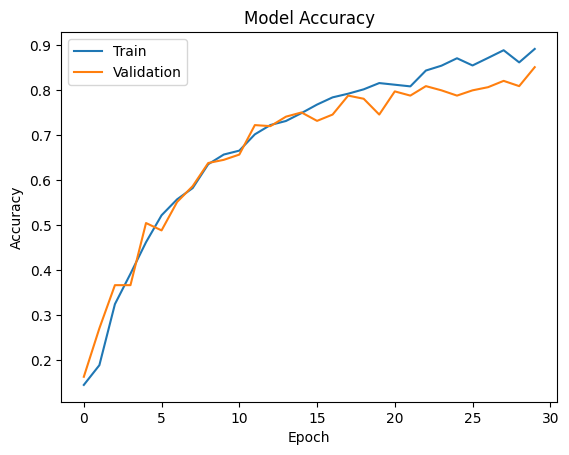

In [205]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model performed very well with Accuracy of:0.82 on normalized test data

In [210]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6626 - accuracy: 0.8274 - 68ms/epoch - 5ms/step


In [211]:
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


Building up the confusion matrix

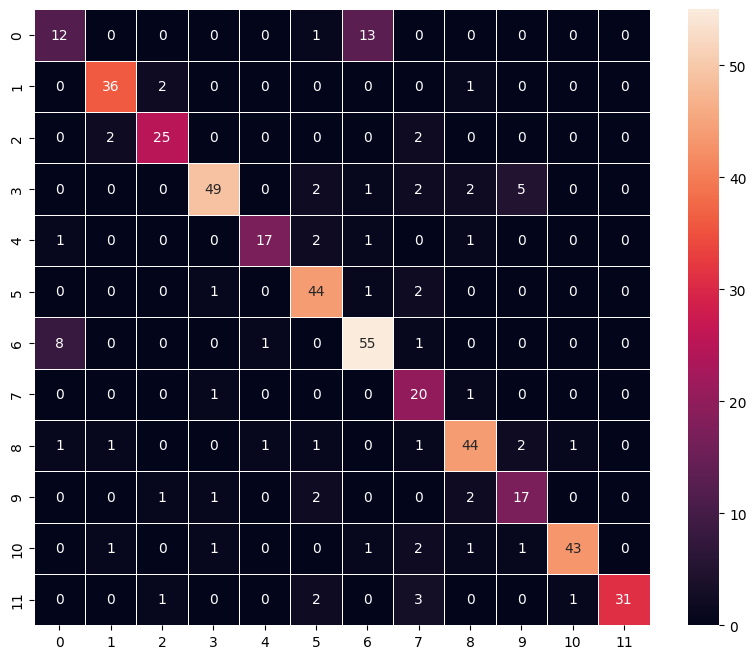

In [212]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Confusion matrix look advanced to before models . There is still some problem on predicting 0,6 but having a very good result

### Visualizing the prediction

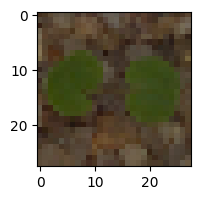

1/1 [==============================] - 0s 26ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


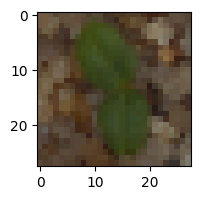

1/1 [==============================] - 0s 26ms/step
Predicted Label ['Cleavers']
True Label Cleavers


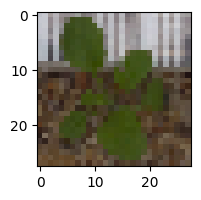

1/1 [==============================] - 0s 23ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [217]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,28,28,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,28,28,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,28,28,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## FINAL RESULTS

In [218]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model','Final Model'],'Train Accuracy':['42%','72%','51%','89%'],'Validation Accuracy':['53%','76%','56%','85%'],'Test Accuracy':['51%','69%','51%','82%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,42%,53%,51%
1,CNN Model with Data Augmentation,72%,76%,69%
2,Transfer Learning Model,51%,56%,51%
3,Final Model,89%,85%,82%


**OBSERVATIONS**



1.   Changing CNN parameters using enlarged data set (Data Augmentation) with SGD optimizer created a good result on FINAL MODEL
2.   Its obvious that Data Augmenttaion has a huge impact on model improvement
3.   Its obvious that Transfer Learning method decreased overfitting since validation and training set nearly have same pattern
4.   Model performed well on enlarged data set





## Actionable Insights and Business Recommendations



*   To decrease the manuel work this workout proves that , AI/CNN is very good methodology for prediction to check plants  growing correctly

*   So company can shift to automated predictions safely instead of manuel work to decrease opex of labor
*   AI/CNN is very convenient and robust to recognize different plants and weeds
*   Time and energy required to identify plant seeding will be greatly shortened by AI and Deeep Learning
*   Efficiency and productivity of plants will increase with the help of CNN AI leraning methodology

*   As data scientist my recommendation is to find methodologies for removing manuel labor and develop automative learning mechanisms to improve prodcutivity,efficiency and time management.










_____